understanding nn.linear

In [3]:
import time
from turtle import end_fill
def is_prime(n):
    if n == 2:
        return True
    if n < 2 or n % 2 == 0:
        return False
    for i in range(3, int(n ** 0.5) + 1, 2):
        if n % i == 0:
            return False
    return True
start = time.time()
a = is_prime(100000000003)
end = time.time()
print(end- start,type(end -start))

0.02218770980834961 <class 'float'>


In [8]:
import torch
import torch.nn as nn
in_dim,out_dim = 3,4
x = torch.ones(2,1,5,3)


linear = nn.Linear(in_dim,out_dim,bias=True)

print("x: ",x)
print("\np: ",list(linear.parameters()))
print("\nw@x: ",linear(x))

NameError: name '_C' is not defined

In [6]:
import torch
import torch.nn as nn

a = torch.randn(2,3,4)
print(a)
print(a[:,1:2,:])

tensor([[[ 0.1362,  0.3859,  1.0634,  0.7680],
         [ 1.8667, -0.7687, -0.2470, -0.6673],
         [-0.0383, -0.2510, -0.6194,  1.1227]],

        [[-3.4334,  1.2783,  0.0611,  0.2576],
         [-0.2005, -0.3494,  0.1907, -1.7588],
         [-0.4214, -0.2687, -0.1559, -0.3147]]])
tensor([[[ 1.8667, -0.7687, -0.2470, -0.6673]],

        [[-0.2005, -0.3494,  0.1907, -1.7588]]])


In [1]:
path = '/cluster/home/austinen/NTNU/SSD/DiT/layers/attention.py'

from abstract import get_yaml

get_yaml(path,"/cluster/home/austinen/NTNU/SSD/DiT/config/attention.yaml")




{'Attention(Module)': {'constructor_arguments': {'p_or_not': False, 'norm_layer': <_ast.Name object at 0x7f052c3c5280>, 'proj_drop': 0.0, 'attn_drop': 0.0, 'qk_norm': False, 'qkv_bias': False, 'num_heads': 8, 'dim': None}, 'class_attributes': ['num_heads', 'head_dim', 'scale', 'fused_attn', 'p_or_not', 'qkv', 'q_norm', 'k_norm', 'attn_drop', 'proj', 'proj_drop'], 'class_methods': {'forward': {'arguments': {'x': None}, 'returns': ['x']}}}, 'CrossAttention(Module)': {'constructor_arguments': {'norm_layer': <_ast.Name object at 0x7f052c2a03d0>, 'proj_drop': 0.0, 'attn_drop': 0.0, 'qk_norm': False, 'qkv_bias': False, 'num_heads': 8, 'dim': None}, 'class_attributes': ['num_heads', 'head_dim', 'scale', 'fused_attn', 'kv', 'q', 'q_norm', 'k_norm', 'attn_drop', 'proj', 'proj_drop'], 'class_methods': {'forward': {'arguments': {'y': None, 'x': None}, 'returns': ['x']}}}}


In [3]:
import torch
from einops import rearrange

tensor = torch.randn(2, 3, 3, 2)  # Shape: (batch, height, width, channels)
rearranged_tensor = rearrange(tensor, 'b h w c -> b c h w')
print(tensor)
print(rearranged_tensor)
print(rearranged_tensor.shape)  # Output: torch.Size([32, 3, 64, 64])


tensor([[[[ 0.5812,  1.4212],
          [-0.9178,  0.9555],
          [ 0.7901, -0.6107]],

         [[ 0.7746, -0.3878],
          [ 1.0879, -0.1577],
          [ 1.9481, -0.2370]],

         [[-0.4568,  2.5339],
          [ 1.2303,  0.9501],
          [-1.3423,  0.9790]]],


        [[[-0.4792,  0.2923],
          [ 0.4718,  1.1099],
          [ 1.8913,  0.6545]],

         [[-0.2881, -2.2775],
          [-0.9117,  0.4905],
          [-0.6023, -0.1079]],

         [[ 0.2644,  0.8759],
          [ 0.1166,  0.6970],
          [-2.6839, -1.0350]]]])
tensor([[[[ 0.5812, -0.9178,  0.7901],
          [ 0.7746,  1.0879,  1.9481],
          [-0.4568,  1.2303, -1.3423]],

         [[ 1.4212,  0.9555, -0.6107],
          [-0.3878, -0.1577, -0.2370],
          [ 2.5339,  0.9501,  0.9790]]],


        [[[-0.4792,  0.4718,  1.8913],
          [-0.2881, -0.9117, -0.6023],
          [ 0.2644,  0.1166, -2.6839]],

         [[ 0.2923,  1.1099,  0.6545],
          [-2.2775,  0.4905, -0.1079],
        

In [4]:
from einops import rearrange

a = torch.rand(2,3,3,2)
b = rearrange(a,'b h w c -> b c h w')
b.shape

torch.Size([2, 2, 3, 3])

In [2]:
import math
import torch
def get_timestep_embedding(timesteps, embedding_dim):
    """
    This matches the implementation in Denoising Diffusion Probabilistic Models:
    From Fairseq.
    Build sinusoidal embeddings.
    This matches the implementation in tensor2tensor, but differs slightly
    from the description in Section 3.5 of "Attention Is All You Need".
    """
    assert len(timesteps.shape) == 1

    half_dim = embedding_dim // 2
    emb = math.log(10000) / (half_dim - 1)
    emb = torch.exp(torch.arange(half_dim, dtype=torch.float32) * -emb)
    emb = emb.to(device=timesteps.device)
    emb = timesteps.float()[:, None] * emb[None, :]
    emb = torch.cat([torch.sin(emb), torch.cos(emb)], dim=1)
    if embedding_dim % 2 == 1:  # zero pad
        emb = torch.nn.functional.pad(emb, (0,1,0,0))
    return emb

t = torch.tensor([a for a in range(0,5)])

m = get_timestep_embedding(t,1000)
t,m

(tensor([0, 1, 2, 3, 4]),
 tensor([[ 0.0000,  0.0000,  0.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 0.8415,  0.8314,  0.8213,  ...,  1.0000,  1.0000,  1.0000],
         [ 0.9093,  0.9239,  0.9370,  ...,  1.0000,  1.0000,  1.0000],
         [ 0.1411,  0.1952,  0.2477,  ...,  1.0000,  1.0000,  1.0000],
         [-0.7568, -0.7070, -0.6544,  ...,  1.0000,  1.0000,  1.0000]]))

In [1]:
import numpy as np

a = np.array([1,2,3])
a.shape


(3,)

In [6]:
import numpy as np

# Example values
betas = np.array([0.1, 0.2, 0.3, 0.4])
alphas_cumprod_prev = np.array([0.9, 0.8, 0.7, 0.6])
alphas_cumprod = np.array([0.95, 0.85, 0.75, 0.65])

# Calculate posterior variance
posterior_variance = ((betas * (1.0 - alphas_cumprod_prev))/ (1.0 - alphas_cumprod))

print("betas:", betas)
print("alphas_cumprod_prev:", alphas_cumprod_prev)
print("alphas_cumprod:", alphas_cumprod)
print("posterior_variance:", posterior_variance)

betas: [0.1 0.2 0.3 0.4]
alphas_cumprod_prev: [0.9 0.8 0.7 0.6]
alphas_cumprod: [0.95 0.85 0.75 0.65]
posterior_variance: [0.2        0.26666667 0.36       0.45714286]


code decoding

In [5]:
# gaussian_diffusion
import torch
tensor = torch.tensor([[[1,2,3]],[[1,2,3]],[[1,2,3]],[[4,5,6]],[[4,5,6]],[[4,5,6]]],dtype=torch.float)
mean = tensor.mean(dim=list(range(1, len(tensor.shape))))
tensor,mean

(tensor([[[1., 2., 3.]],
 
         [[1., 2., 3.]],
 
         [[1., 2., 3.]],
 
         [[4., 5., 6.]],
 
         [[4., 5., 6.]],
 
         [[4., 5., 6.]]]),
 tensor([2., 2., 2., 5., 5., 5.]))

In [9]:
import torch

NameError: name '_C' is not defined

In [2]:
import torch

def mean_flat(tensor):
    """
    Take the mean over all non-batch dimensions.
    """
    return tensor.mean(dim=list(range(1, len(tensor.shape))))
a = torch.tensor([[[[1,2,3]]],[[[4,5,6]]]],dtype=torch.float)
mean_flat(a)

tensor([2., 5.])

In [6]:
import torch as th
import numpy as np
broadcast_shape =(3,2,4,4)
arr = np.array([1,4,9,25,36,49,64,81,100])
timesteps = [3,6,8]
res = th.from_numpy(arr)[timesteps].float()
while len(res.shape) < len(broadcast_shape):
    res = res[..., None]
res + th.zeros(broadcast_shape)

tensor([[[[ 25.,  25.,  25.,  25.],
          [ 25.,  25.,  25.,  25.],
          [ 25.,  25.,  25.,  25.],
          [ 25.,  25.,  25.,  25.]],

         [[ 25.,  25.,  25.,  25.],
          [ 25.,  25.,  25.,  25.],
          [ 25.,  25.,  25.,  25.],
          [ 25.,  25.,  25.,  25.]]],


        [[[ 64.,  64.,  64.,  64.],
          [ 64.,  64.,  64.,  64.],
          [ 64.,  64.,  64.,  64.],
          [ 64.,  64.,  64.,  64.]],

         [[ 64.,  64.,  64.,  64.],
          [ 64.,  64.,  64.,  64.],
          [ 64.,  64.,  64.,  64.],
          [ 64.,  64.,  64.,  64.]]],


        [[[100., 100., 100., 100.],
          [100., 100., 100., 100.],
          [100., 100., 100., 100.],
          [100., 100., 100., 100.]],

         [[100., 100., 100., 100.],
          [100., 100., 100., 100.],
          [100., 100., 100., 100.],
          [100., 100., 100., 100.]]]])

In [5]:
import torch as th

x = th.rand(1,1,512,512)
y = th.rand(1,1,512,512)
model_kwargs = dict(arun=y)
print(model_kwargs)

def get_shape(x,y,arun):
    print("x: ",x.shape)
    print("y: ",y.shape)

get_shape(x,th.tensor([1,2,3]),**model_kwargs)

{'arun': tensor([[[[0.1176, 0.6893, 0.6119,  ..., 0.4597, 0.9448, 0.1053],
          [0.6561, 0.3812, 0.4727,  ..., 0.4260, 0.7404, 0.0370],
          [0.0885, 0.6857, 0.2714,  ..., 0.2565, 0.1975, 0.3912],
          ...,
          [0.6081, 0.7448, 0.8228,  ..., 0.1957, 0.3529, 0.9600],
          [0.3280, 0.7077, 0.1382,  ..., 0.3807, 0.2672, 0.0781],
          [0.7071, 0.7830, 0.0198,  ..., 0.6069, 0.4349, 0.5477]]]])}
x:  torch.Size([1, 1, 512, 512])
y:  torch.Size([3])


In [6]:
import cProfile
import pstats

def is_prime():
    s = 0
    for i in range(100000):
        if i % 2 == 0:
            s += i
    print(s)

profiler = cProfile.Profile()
profiler.runcall(is_prime)
stats = pstats.Stats(profiler)
stats.strip_dirs()
stats.sort_stats('cumulative')

# Print only the stats for your function
stats.print_callees('is_prime')

2499950000
   Ordered by: cumulative time
   List reduced from 16 to 1 due to restriction <'is_prime'>

Function                                    called...
                                                ncalls  tottime  cumtime
<ipython-input-6-9ac79316d2e4>:4(is_prime)  ->       1    0.000    0.000  {built-in method builtins.print}




In [10]:
import cProfile
import pstats
import re

def square(x):
    return x ** 2

def is_prime():
    s = 0
    for i in range(100000):
        if i % 2 == 0:
            s += square(i)

    print(s)
            
profiler = cProfile.Profile()
profiler.runcall(is_prime)

stats = pstats.Stats(profiler)
stats.strip_dirs()  # Remove the file path
stats.sort_stats('cumulative')

# Exclude lines containing '<built-in'
stats.print_stats(lambda x: re.search(r'(<built-in|lib/python|dist-packages|site-packages)', x[1]) is None)

166661666700000
         50037 function calls in 0.035 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.018    0.018    0.035    0.035 <ipython-input-10-42dd56e58909>:8(is_prime)
    50000    0.017    0.000    0.017    0.000 <ipython-input-10-42dd56e58909>:5(square)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.print}
        2    0.000    0.000    0.000    0.000 iostream.py:384(write)
        3    0.000    0.000    0.000    0.000 iostream.py:195(schedule)
        3    0.000    0.000    0.000    0.000 socket.py:342(send)
        2    0.000    0.000    0.000    0.000 iostream.py:321(_schedule_flush)
        3    0.000    0.000    0.000    0.000 threading.py:1071(is_alive)
        3    0.000    0.000    0.000    0.000 threading.py:1017(_wait_for_tstate_lock)
        2    0.000    0.000    0.000    0.000 iostream.py:308(_is_master_process)
        3    0.000    0.000    0.000    0.000 

In [1]:
import torch
a = torch.rand(2,3,4)
print(a)
c = a[-1:,...][None,...]
print(c)

tensor([[[0.4119, 0.3200, 0.5959, 0.4846],
         [0.9430, 0.1285, 0.8980, 0.3644],
         [0.4885, 0.3542, 0.7639, 0.3828]],

        [[0.2330, 0.6215, 0.2737, 0.9938],
         [0.6177, 0.8595, 0.5595, 0.4538],
         [0.0083, 0.5022, 0.7572, 0.9818]]])
tensor([[[[0.2330, 0.6215, 0.2737, 0.9938],
          [0.6177, 0.8595, 0.5595, 0.4538],
          [0.0083, 0.5022, 0.7572, 0.9818]]]])


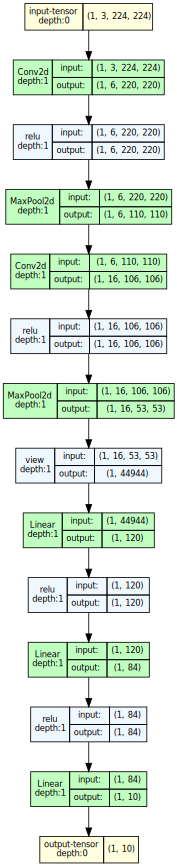

In [9]:
import torch
from torchviz import make_dot
import torch.nn as nn 
import torch.nn.functional as F

class model(nn.Module):
    def __init__(self):
        super(model,self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Adjusted the input size for fc1 according to the new calculation
        self.fc1 = nn.Linear(16 * 53 * 53, 120)  # Adjusted size
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # Adjust the view to match the new size
        x = x.view(-1, 16 * 53 * 53)  # Adjusted size
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
m = model()  

from torchview import draw_graph

batch_size = 2
# device='meta' -> no memory is consumed for visualization
model_graph = draw_graph(m, input_size=(1, 3, 224, 224) , device='meta')
model_graph.visual_graph
# dummy_input = torch.randn(1, 3, 224, 224)  # Example for an input size, adjust according to your model
# output = m(dummy_input)

# Visualize the graph
# graph = make_dot(output, params=dict(m.named_parameters()))
# graph.render("model_graph", format="png")  # This saves the graph as a PNG image. You can also use 'pdf' for PDF format.

In [1]:
import torch
import torch.nn as nn

# Define a simple GroupNorm layer
# Assume we have 8 channels in total and we want to group them into 4 groups
# This means each group will contain 2 channels
group_norm = nn.GroupNorm(num_groups=4, num_channels=8)

# Create a dummy input tensor
# Let's say our batch size is 2, with 8 channels, and spatial dimensions of height and width being 5x5
# The shape of the input tensor is [batch_size, channels, height, width]
input_tensor = torch.randn(2, 8, 5, 5)

# Apply Group Normalization
normalized_output = group_norm(input_tensor)

print("Input Tensor Shape:", input_tensor.shape)
print("Normalized Output Shape:", normalized_output.shape)

Input Tensor Shape: torch.Size([2, 8, 5, 5])
Normalized Output Shape: torch.Size([2, 8, 5, 5])


In [11]:
import torch
import torch.nn as nn

class news(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10,128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(64 * 24 * 24, 128)
        self.fc2 = nn.Linear(128, 10)
        self.k = news()

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.k(x)

        return x

layer_info = []

def print_layer_info(module, input, output):
    module_name = module.__name__
    input_size = input[0].size() if isinstance(input, tuple) else input.size()
    output_size = output.size()
    indent = " " * (module.__depth__ * 2)
    layer_info.append(f"{indent}{module_name} | Input Size: {input_size} | Output Size: {output_size}")
    print(layer_info[-1])


def register_hooks(module, parent_name="",depth=0):
    module_name = parent_name + ('.' if parent_name else '') + (module.__class__.__name__)
    module.__name__ = module_name
    module.__depth__ = depth    
    
    if not list(module.children()):  
        module.register_forward_hook(print_layer_info)

    named_modules = {m for _, m in module.named_children()}
    for n in module.children():
        if n not in named_modules:
          print("unnamed module detected")
    
    for name, child in module.named_children():
        child_name = module_name + ('.' if module_name else '') + name
        register_hooks(child, child_name,depth + 1)


register_hooks(model, model.__class__.__name__)

model = MyModel()
register_hooks(model)

x = torch.randn(1, 1, 28, 28)

output = model(x)



  MyModel.conv1.Conv2d | Input Size: torch.Size([1, 1, 28, 28]) | Output Size: torch.Size([1, 32, 26, 26])
  MyModel.conv2.Conv2d | Input Size: torch.Size([1, 32, 26, 26]) | Output Size: torch.Size([1, 64, 24, 24])
  MyModel.fc1.Linear | Input Size: torch.Size([1, 36864]) | Output Size: torch.Size([1, 128])
  MyModel.fc2.Linear | Input Size: torch.Size([1, 128]) | Output Size: torch.Size([1, 10])
    MyModel.k.news.fc1.Linear | Input Size: torch.Size([1, 10]) | Output Size: torch.Size([1, 128])
    MyModel.k.news.fc2.Linear | Input Size: torch.Size([1, 128]) | Output Size: torch.Size([1, 10])


In [1]:
import torch

# Create a tensor of shape [2, 3, 4, 5]
# This could represent a batch of 2 images, with 3 channels, height of 4, and width of 5
x = torch.arange(2*3*4*5).reshape(2, 3, 4, 5)

print(x)
print("Original shape:", x.shape)
# Output: Original shape: torch.Size([2, 3, 4, 5])

# Flatten starting from the 3rd dimension
flattened_x = x.flatten(2)

print(flattened_x)
print("Shape after flatten(2):", flattened_x.shape)
# Output: Shape after flatten(2): torch.Size([2, 3, 20])

Original shape: torch.Size([2, 3, 4, 5])
Shape after flatten(2): torch.Size([2, 3, 20])


In [9]:

import yaml

yaml_file_path = "/cluster/home/austinen/NTNU/SSD/MedSegDiff/info/arguments.yaml"

with open(yaml_file_path, 'r') as file:
    data = yaml.safe_load(file)

defaults = data['train']  
defaults.update(data['model'])
defaults.update(data['diffusion'])
print(defaults)

{'data_name': 'BRATS', 'data_dir': '../dataset/brats2020/training', 'schedule_sampler': 'uniform', 'lr': '1e-4', 'weight_decay': 0.0, 'lr_anneal_steps': 0, 'batch_size': 1, 'microbatch': -1, 'ema_rate': '0.9999', 'log_interval': 100, 'save_interval': 5000, 'resume_checkpoint': 'None', 'use_fp16': False, 'fp16_scale_growth': '1e-3', 'gpu_dev': '0', 'multi_gpu': 'None', 'out_dir': './results/', 'image_size': 64, 'num_channels': 128, 'num_res_blocks': 2, 'num_heads': 4, 'in_ch': 5, 'num_heads_upsample': -1, 'num_head_channels': -1, 'attention_resolutions': '16,8', 'channel_mult': '', 'dropout': 0.0, 'class_cond': False, 'use_checkpoint': False, 'use_scale_shift_norm': True, 'resblock_updown': False, 'use_new_attention_order': False, 'dpm_solver': False, 'version': 'new', 'learn_sigma': False, 'diffusion_steps': 1000, 'noise_schedule': 'linear', 'timestep_respacing': '', 'use_kl': False, 'predict_xstart': False, 'rescale_timesteps': False, 'rescale_learned_sigmas': False}
